In [118]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

# Goals
1. load data
1. explore/manipulate/describe df
1. scatterplots/hist
1. correlations
1. feature eng
1. model basics

# model steps
1. business question and hypotheses
2. data qa
- sql 
- pandas
3. data exploration
- sql
- pandas
- charts
4. correlations
5. encoding
6. feature eng
7. train test split
8. regressor, pick evaluation metric
9. pipeline, gridsearch
10. model evaluation, re-run with param, feature changes

# Load Data

In [105]:
# load data
df = pd.read_csv('test_data.csv')
# 100x faster if specify datatypes
# load first time
# df.head()
# get datatypes
# dtypes dict to load faster {'name': dtype}

In [3]:
df

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating
0,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4.414659,1,1,0.000967,3.821800
1,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",1.939185,0,0,0.140914,0.627153
2,8,oakley polarized radar,Oakley Sunglasses - Radar Path Polished Black/...,"Durability and all-day comfort of lightweight,...",3.087276,1,1,0.198058,2.588703
3,10,boyfriend jeans,How To Make An American Quilt (DVD),ITEM#: 2518897\nDirector Jocelyn Moorhouse's f...,1.115320,0,0,0.173507,3.889947
4,13,screen protector samsung,ZAGG InvisibleShield Cell Phone Screen Protect...,Protect your most precious technology with the...,4.505012,1,1,1.046984,1.036992
...,...,...,...,...,...,...,...,...,...
20785,32662,hawaiian shirt,La Leela Likre Mens' Blue Tropical Printed Bea...,NaN,3.190835,0,0,0.027950,0.677359
20786,32664,bluesky gel nail polish,"Sally Hansen Miracle Gel Nail Color, Red Eye 0...",Get salon-quality results with Miracle Gel Sal...,0.654658,0,0,0.022792,3.720549
20787,32665,seagate 2tb hard disk,Seagate Backup Plus STDU4000100 4 TB 3.5 Exter...,"Founded in 1979, Seagate is the leading provid...",1.958592,0,0,0.357745,3.087500
20788,32667,storage ottoman,"Chevron Storage Ottoman, Gray and White",Whether it be to hide away clutter in the room...,3.113347,0,0,0.169169,3.230875


In [12]:
df.head()

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating
0,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4.414659,1,1,0.000967,3.821800
1,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",1.939185,0,0,0.140914,0.627153
2,8,oakley polarized radar,Oakley Sunglasses - Radar Path Polished Black/...,"Durability and all-day comfort of lightweight,...",3.087276,1,1,0.198058,2.588703
3,10,boyfriend jeans,How To Make An American Quilt (DVD),ITEM#: 2518897\nDirector Jocelyn Moorhouse's f...,1.115320,0,0,0.173507,3.889947
4,13,screen protector samsung,ZAGG InvisibleShield Cell Phone Screen Protect...,Protect your most precious technology with the...,4.505012,1,1,1.046984,1.036992


In [8]:
# only 1 column --> df to series
# type(df['product_rating'].head())
# series will have different methods
# series ~= col (1d)
# pandas df
# df == collection of series
df['product_rating'].head()

0    3.821800
1    0.627153
2    2.588703
3    3.889947
4    1.036992
Name: product_rating, dtype: float64

In [15]:
# df['product_rating'].dimensions()
df.shape

(20790, 9)

In [16]:
# get the descriptive stats for df
# scatter plot
# histogram

# descr stats

In [17]:
#df.describe()

,id,median_relevance,click_success,purch_success,relevance_variance,product_rating
count,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000
mean,16335.645551,2.697612,0.577537,0.390717,0.329137,3.016524
std,9431.237016,0.986142,0.493963,0.487923,0.328607,0.998977
min,3.000000,0.000000,0.000000,0.000000,0.000013,0.095885
25%,8167.000000,2.036946,0.000000,0.000000,0.094317,2.295748
50%,16337.000000,2.851657,1.000000,0.000000,0.225596,3.094117
75%,24500.750000,3.328521,1.000000,1.000000,0.455361,3.801540
max,32670.000000,5.000000,1.000000,1.000000,3.132477,4.991039


In [23]:
#df level -- can i just check all at same time?
# identity matrix filter
df.isnull()

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating
0,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20785,False,False,False,True,False,False,False,False,False
20786,False,False,False,False,False,False,False,False,False
20787,False,False,False,False,False,False,False,False,False
20788,False,False,False,False,False,False,False,False,False


In [26]:
#create df filter
# isnull df
# can apply this filter to original df
df.isnull()[['id', 'query']]

,id,query
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
20785,False,False
20786,False,False
20787,False,False
20788,False,False


In [46]:
# get only rows w/ a null value
# apply filter to original df
# just brackets == get columns
# brackets with parents filtering
# df[(filter)]
# df[] select col based on actual columns names

# filter -- for every row what do i do?
# filter on a series must be length of df
# -- 1 value per row -- string != series
# so manipulate df and get a series

# start w/ just 1 filter
# df.notnull()[['product_description']]
df['product_description'].notnull()

0        False
1         True
2         True
3         True
4         True
         ...  
20785    False
20786     True
20787     True
20788     True
20789     True
Name: product_description, Length: 20790, dtype: bool

In [54]:
# filter df based on series of booleans
# just use the true
df[df['product_description'].isnull()].sort_values('id')

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating
6463,3,electric griddle,Star-Max 48 in Electric Griddle,NaN,3.355419,1,0,0.708907,4.555760
0,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4.414659,1,1,0.000967,3.821800
6464,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN,3.533850,1,1,0.348257,3.125811
6470,22,headphones earbuds,Motorola Flexible EarBud Receiver - headphone,NaN,3.061181,1,0,0.286174,3.091192
6476,36,memory foam pillow,InRoom Designs Memory Foam Pillow,NaN,3.046341,1,0,0.314189,2.461383
...,...,...,...,...,...,...,...,...,...
6457,32640,converse high tops,Toddler Converse Chuck Taylor High Top Sneaker...,NaN,4.143418,1,1,0.831732,3.644594
20781,32651,16 gb memory card,Sony 16GB SDHC Class 10 Memory Card,NaN,3.499483,1,1,0.150303,3.432472
20782,32654,wired xbox 360 controller,Green light Glow Wired Game Remote Controller ...,NaN,2.829157,1,1,1.223567,1.326378
20785,32662,hawaiian shirt,La Leela Likre Mens' Blue Tropical Printed Bea...,NaN,3.190835,0,0,0.027950,0.677359


In [53]:
df[df['product_description'].notnull()].sort_values('id')

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating
1,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",1.939185,0,0,0.140914,0.627153
2,8,oakley polarized radar,Oakley Sunglasses - Radar Path Polished Black/...,"Durability and all-day comfort of lightweight,...",3.087276,1,1,0.198058,2.588703
6465,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...,1.879869,0,0,0.308495,1.759055
3,10,boyfriend jeans,How To Make An American Quilt (DVD),ITEM#: 2518897\nDirector Jocelyn Moorhouse's f...,1.115320,0,0,0.173507,3.889947
6466,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S...",1.733546,0,0,0.206133,4.358133
...,...,...,...,...,...,...,...,...,...
6461,32663,playstation vita system,MLB 15: The Show (PlayStation Vita),An essential part of every fan’s season and Th...,2.256562,0,0,0.032402,4.060585
20786,32664,bluesky gel nail polish,"Sally Hansen Miracle Gel Nail Color, Red Eye 0...",Get salon-quality results with Miracle Gel Sal...,0.654658,0,0,0.022792,3.720549
20787,32665,seagate 2tb hard disk,Seagate Backup Plus STDU4000100 4 TB 3.5 Exter...,"Founded in 1979, Seagate is the leading provid...",1.958592,0,0,0.357745,3.087500
20788,32667,storage ottoman,"Chevron Storage Ottoman, Gray and White",Whether it be to hide away clutter in the room...,3.113347,0,0,0.169169,3.230875


In [55]:
df.sort_values('id').head(10)

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating
6463,3,electric griddle,Star-Max 48 in Electric Griddle,NaN,3.355419,1,0,0.708907,4.555760
0,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4.414659,1,1,0.000967,3.821800
6464,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN,3.533850,1,1,0.348257,3.125811
1,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",1.939185,0,0,0.140914,0.627153
2,8,oakley polarized radar,Oakley Sunglasses - Radar Path Polished Black/...,"Durability and all-day comfort of lightweight,...",3.087276,1,1,0.198058,2.588703
6465,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...,1.879869,0,0,0.308495,1.759055
3,10,boyfriend jeans,How To Make An American Quilt (DVD),ITEM#: 2518897\nDirector Jocelyn Moorhouse's f...,1.115320,0,0,0.173507,3.889947
6466,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S...",1.733546,0,0,0.206133,4.358133
4,13,screen protector samsung,ZAGG InvisibleShield Cell Phone Screen Protect...,Protect your most precious technology with the...,4.505012,1,1,1.046984,1.036992
6467,14,table clock,Classy Wood Table Clock,Watch out for this antique wood table clock wh...,2.840815,1,1,0.124887,4.457892


In [56]:
# axis = 0 --> column name dont do this
# axis = 1 --> do per row
df.apply(lambda x: 1 if pd.isnull(x.product_description) else 0, axis=1)

SyntaxError: invalid syntax (<ipython-input-56-1378e69e0d46>, line 1)

In [61]:
def rows_are_series(prod_desc_series):
    print(type(prod_desc_series))
#     if df.

In [63]:
# df.apply(rows_are_series, axis=1)

In [64]:
def prod_desc_null(series):
    if pd.isnull(series.product_description):
        return 1
    else:
        return 0
#     if df.

In [65]:
df.apply(prod_desc_null, axis=1)

0        1
1        0
2        0
3        0
4        0
        ..
20785    1
20786    0
20787    0
20788    0
20789    0
Length: 20790, dtype: int64

In [66]:
df['prod_desc_null'] = df.apply(prod_desc_null, axis=1)

In [70]:
df.head(2)

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating,prod_desc_null
0,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4.414659,1,1,0.000967,3.821800,1
1,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",1.939185,0,0,0.140914,0.627153,0


In [75]:
df['purch_success'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20785    False
20786    False
20787    False
20788    False
20789    False
Name: purch_success, Length: 20790, dtype: bool

In [82]:
# check if column is not a number
df[df['purch_success'].isna()]

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating,prod_desc_null


In [85]:
# remove nan
df_clean_purch_success = df[df['purch_success'].notna()]

In [87]:
df_clean_purch_success.head()

,id,query,product_title,product_description,median_relevance,click_success,purch_success,relevance_variance,product_rating,prod_desc_null
0,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4.414659,1,1,0.000967,3.821800,1
1,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",1.939185,0,0,0.140914,0.627153,0
2,8,oakley polarized radar,Oakley Sunglasses - Radar Path Polished Black/...,"Durability and all-day comfort of lightweight,...",3.087276,1,1,0.198058,2.588703,0
3,10,boyfriend jeans,How To Make An American Quilt (DVD),ITEM#: 2518897\nDirector Jocelyn Moorhouse's f...,1.115320,0,0,0.173507,3.889947,0
4,13,screen protector samsung,ZAGG InvisibleShield Cell Phone Screen Protect...,Protect your most precious technology with the...,4.505012,1,1,1.046984,1.036992,0


In [88]:
df.describe()

,id,median_relevance,click_success,purch_success,relevance_variance,product_rating,prod_desc_null
count,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000
mean,16335.645551,2.697612,0.577537,0.390717,0.329137,3.016524,0.244012
std,9431.237016,0.986142,0.493963,0.487923,0.328607,0.998977,0.429510
min,3.000000,0.000000,0.000000,0.000000,0.000013,0.095885,0.000000
25%,8167.000000,2.036946,0.000000,0.000000,0.094317,2.295748,0.000000
50%,16337.000000,2.851657,1.000000,0.000000,0.225596,3.094117,0.000000
75%,24500.750000,3.328521,1.000000,1.000000,0.455361,3.801540,0.000000
max,32670.000000,5.000000,1.000000,1.000000,3.132477,4.991039,1.000000


In [1]:
# just count if null
# df.apply(lambda x: if x.purch_success.isna then 1 else 0)

In [91]:
df.isna().sum()

id                        0
query                     0
product_title             0
product_description    5073
median_relevance          0
click_success             0
purch_success             0
relevance_variance        0
product_rating            0
prod_desc_null            0
dtype: int64

In [97]:
df.isnull().sum()

id                        0
query                     0
product_title             0
product_description    5073
median_relevance          0
click_success             0
purch_success             0
relevance_variance        0
product_rating            0
prod_desc_null            0
dtype: int64

In [98]:
df.isnull().mean()

id                     0.000000
query                  0.000000
product_title          0.000000
product_description    0.244012
median_relevance       0.000000
click_success          0.000000
purch_success          0.000000
relevance_variance     0.000000
product_rating         0.000000
prod_desc_null         0.000000
dtype: float64

In [99]:
df.notnull().sum()

id                     20790
query                  20790
product_title          20790
product_description    15717
median_relevance       20790
click_success          20790
purch_success          20790
relevance_variance     20790
product_rating         20790
prod_desc_null         20790
dtype: int64

In [38]:
# df.size
# type(df.groupby('purch_success'))
# df.groupby('purch_success').size()
df.groupby('purch_success').count()

,id,query,product_title,product_description,median_relevance,click_success,relevance_variance,product_rating
purch_success,,,,,,,,
0,12667,12667,12667,9022,12667,12667,12667,12667
1,8123,8123,8123,6695,8123,8123,8123,8123


In [ ]:
# null becomes none in python -- only apply to text 
# nan are null for numerics 
# pandas automatically turns null numerics into nan

# other data cleaning
1. check null vs nan
2. check mins/maxes
3. check date ranges

In [77]:
df.describe()

,id,median_relevance,click_success,purch_success,relevance_variance,product_rating,prod_desc_null
count,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000,20790.000000
mean,16335.645551,2.697612,0.577537,0.390717,0.329137,3.016524,0.244012
std,9431.237016,0.986142,0.493963,0.487923,0.328607,0.998977,0.429510
min,3.000000,0.000000,0.000000,0.000000,0.000013,0.095885,0.000000
25%,8167.000000,2.036946,0.000000,0.000000,0.094317,2.295748,0.000000
50%,16337.000000,2.851657,1.000000,0.000000,0.225596,3.094117,0.000000
75%,24500.750000,3.328521,1.000000,1.000000,0.455361,3.801540,0.000000
max,32670.000000,5.000000,1.000000,1.000000,3.132477,4.991039,1.000000


# scatterplots/hist


In [ ]:
# all plots under df.plot

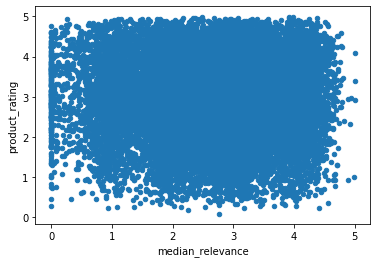

In [8]:
df.plot.scatter('median_relevance', 'product_rating')

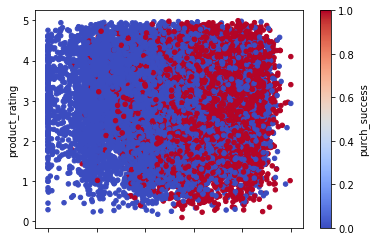

In [16]:
df.plot.scatter('median_relevance', 'product_rating', c='purch_success', colormap='coolwarm')

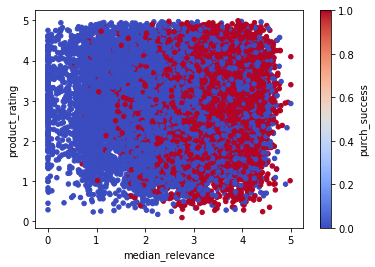

In [26]:
fig, ax = plt.subplots()
ax = df.plot.scatter('median_relevance', 'product_rating', c='purch_success', colormap='coolwarm', ax=ax)
ax.set_xlabel("median_relevance")
plt.show()


# ax.set_xlabel('median_relevance')
# plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5d02d1350>,
      dtype=object)

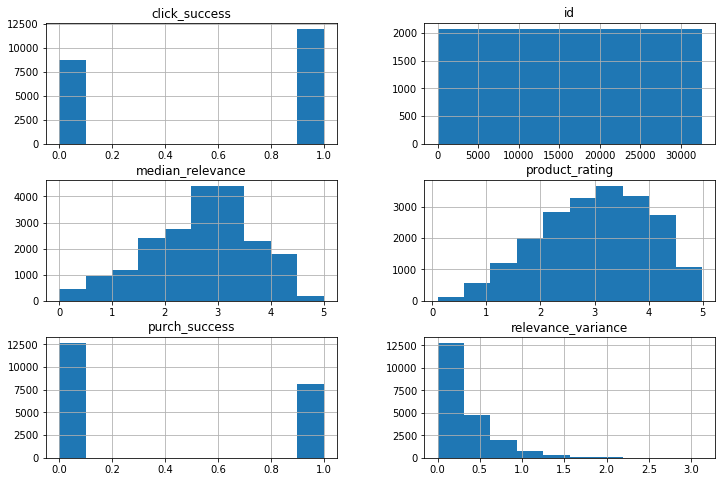

In [34]:
# histogram of ratings
# iterable list of cols
df.hist(figsize=(12,8))
# df.groupby('product_rating').hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc60a4de690>,
      dtype=object)

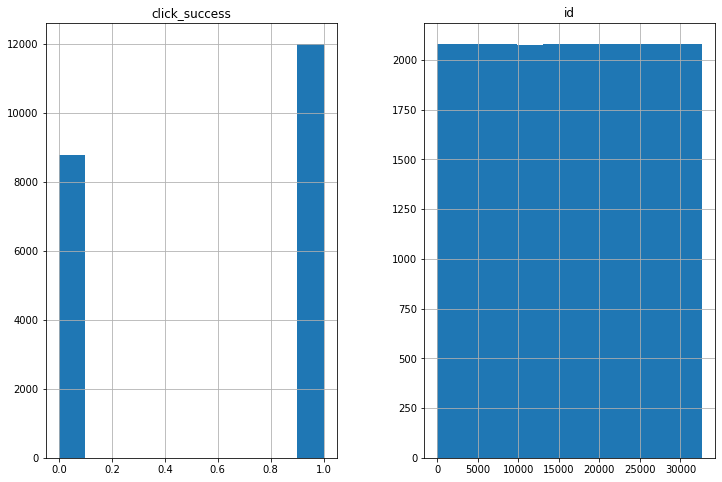

In [48]:
df[['click_success', 'id']].hist(figsize=(12,8))

In [49]:
# two plots
# fig = plt.figure(figsize=(12,6)) ax1 = fig.add_subplot(121)
# ax1.set_title('Model 1 - Ride Distance Between Failures')
# df_since_last_failure[(df_since_last_failure['bird_model_id'] == 1)]['distance_between_failures'].hist(bins = 10,ax=ax1)
# ax2 = fig.add_subplot(122)
# ax2.set_title('Model 2 - Ride Distance Between Failures') df_since_last_failure[(df_since_last_failure['bird_model_id'] == →2)]['distance_between_failures'].hist(bins = 10,ax=ax2)
# plt.show()

# correlations

In [37]:
df.corr().purch_success.sort_values(ascending = False)

purch_success         1.000000
click_success         0.684897
median_relevance      0.433851
product_rating       -0.003292
id                   -0.005817
relevance_variance   -0.016557
Name: purch_success, dtype: float64

# feature eng

In [45]:
# if time, explore more combinations, dummy, derived columns



# model basics

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn import preprocessing, metrics
# from sklearn.pipeline import make_pipeline
import itertools

In [50]:
# baseline descriptive stats
# baseline converison/avg
# train test split
# 

In [70]:
# baseline
conv = 100.0* len(df[df['purch_success'] == 1]) / len(df)
val = "{0:.2f}% conversion rate across {1} searches.".format(conv, len(df))
print(val)

39.07% conversion rate across 20790 searches.


# feature encoding

In [106]:
# quick version ignoring onehotencoder, dict options
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [107]:
categorical_cols

['query', 'product_title', 'product_description']

In [108]:
categorical_cols.remove('product_description')

In [109]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [110]:
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,query,product_title
0,170,17795
1,127,18308
2,151,12191
3,28,7303
4,192,19174
5,167,3631
6,152,12168
7,239,9578
8,223,1582
9,199,5822


# fit model

In [87]:
df.columns.values

array(['id', 'query', 'product_title', 'product_description',
       'median_relevance', 'click_success', 'purch_success',
       'relevance_variance', 'product_rating'], dtype=object)

In [92]:
cols = list(df.columns.values)

In [93]:
cols

['id',
 'query',
 'product_title',
 'product_description',
 'median_relevance',
 'click_success',
 'purch_success',
 'relevance_variance',
 'product_rating']

In [95]:
cols.remove('purch_success')
cols.remove('product_description')

In [96]:
cols

['id',
 'query',
 'product_title',
 'median_relevance',
 'click_success',
 'relevance_variance',
 'product_rating']

In [97]:
features = cols

In [98]:
y = df['purch_success']

In [99]:
X = df[features]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [101]:
y_train

20714    1
334      1
2006     0
6073     0
3674     1
        ..
13123    0
19648    0
9845     0
10799    1
2732     1
Name: purch_success, Length: 14553, dtype: int64

In [102]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=27)

LRsearchCV = LogisticRegressionCV(
#   penalty='l1'
    penalty='l2'
#    ,scoring='accuracy'
    ,scoring='recall' #recall because we want to capture failures, low cost of false positive
    ,cv=kf
    ,n_jobs=4 
    ,random_state=0 
    ,max_iter=100000 
    ,fit_intercept=True 
    ,solver='liblinear'
)
LRsearchCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100000, multi_class='auto',
                     n_jobs=4, penalty='l2', random_state=0, refit=True,
                     scoring='recall', solver='liblinear', tol=0.0001,
                     verbose=0)

# evaluate model

In [114]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`. 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix") 
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[2654 1152]
 [  22 2409]]


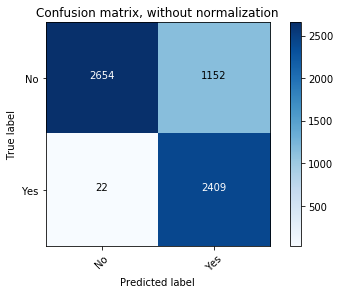

In [121]:
predicted = LRsearchCV.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predicted)

np.set_printoptions(precision=2)
class_names = ['No', 'Yes']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [125]:
print("Accuracy (Test):\t{0:.4g}".format(accuracy_score(y_test, predicted))) 
print("Precision (Test):\t{0:.4g}".format(precision_score(y_test, predicted))) 
print("Recall (Test):\t\t{0:.4g}".format(recall_score(y_test, predicted))) 
print("AUC Score (Test):\t{0:f}".format(roc_auc_score(y_test, predicted)))

Accuracy (Test):	0.8118
Precision (Test):	0.6765
Recall (Test):		0.991
AUC Score (Test):	0.844135
